                    Valette-les-Bains  Thierrynec   Fabredan  ValletVille  \
Valette-les-Bains            0.000000    3.162278   5.000000     2.828427   
Thierrynec                   3.162278    0.000000   7.280110     5.830952   
Fabredan                     5.000000    7.280110   0.000000     5.385165   
ValletVille                  2.828427    5.830952   5.385165     0.000000   
Sainte Michellenec           6.403124    6.082763  11.313708     6.708204   
NavarroBourg                15.652476   18.027756  10.770330    15.000000   
Sainte Claireboeuf           2.000000    4.242641   6.403124     2.000000   

                    Sainte Michellenec  NavarroBourg  Sainte Claireboeuf  
Valette-les-Bains             6.403124     15.652476            2.000000  
Thierrynec                    6.082763     18.027756            4.242641  
Fabredan                     11.313708     10.770330            6.403124  
ValletVille                   6.708204     15.000000            2.000000  
Sainte M

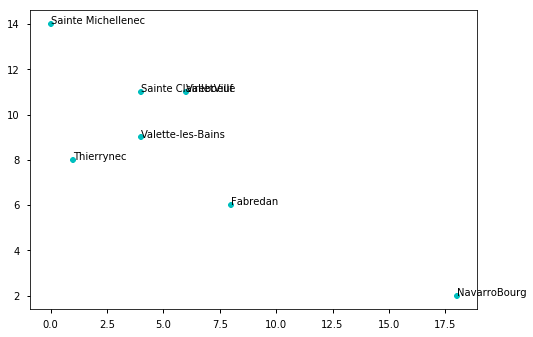

Distance =  29.400534611870107
Path =  ['NavarroBourg', 'Fabredan', 'ValletVille', 'Sainte Claireboeuf', 'Valette-les-Bains', 'Thierrynec', 'Sainte Michellenec']
[44.48711390657503, 47.15578814125195, 47.81000038380877, 47.476149848386584, 48.11508007887529, 45.11255530877618, 46.97060117095879, 47.275680866025304, 47.92989310858212, 44.35519599589547, 50.59856734325905, 46.71879053550587, 47.73048525393861, 48.35592665613976, 45.36689071432821, 45.115080078875295, 45.03304017890603, 44.15578814125195, 45.36689071432821, 45.68725242146284, 47.73048525393861, 44.81000038380877, 44.7279604838395, 41.48711390657503, 47.6369827390868, 50.30565697376372, 48.39686682206662, 48.063016286644434, 48.39686682206662, 45.39434205196751, 47.55746760921664, 47.55746760921664, 45.64867745751954, 46.47710458226573, 48.31735169219646, 49.14577881694265, 50.880354086450374, 48.63771339933109, 48.211679851773454, 49.79999105949947, 47.87782931635127, 51.708781211196566, 48.51675954683998, 46.274118859720

In [262]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random, math, copy
from faker import Faker
from sympy.utilities.iterables import multiset_permutations
from operator import itemgetter


#Styles for plot
%matplotlib inline
plt.style.use('seaborn-notebook')

#constants to generate data     
DOTS_N  = 7
DIST_RANGE = 20
fr_fr_faker = Faker('fr_FR')  # set French facker

#Generator
dots_pure = [random.sample(range(DIST_RANGE),2) for x in range(DOTS_N)]
listofcitynames = [fr_fr_faker.city() for x in range(DOTS_N)]

#Build distance matrix and Data Frame (for test, are not used anywhere for now)
array_dots = np.array(dots_pure)
M=[[math.sqrt(sum([(array_dots[i][d]-array_dots[j][d])**2 for d in[0,1]]))for j in range(DOTS_N)]for i in range(DOTS_N)]
df = pd.DataFrame(np.matrix(M), columns=listofcitynames, index=listofcitynames)
print(df)

#Plot dots with labels
plt.plot([dots_pure[i][0]for i in range(DOTS_N)], [dots_pure[i][1]for i in range(DOTS_N)],'c8')
for i in range(DOTS_N):
    plt.annotate(
        listofcitynames[i],
        xy=(dots_pure[i][0], dots_pure[i][1]))
plt.show()  

#Combine city names and dots
dots =[[listofcitynames[i],dots_pure[i]] for i in range(DOTS_N)]

#Generate all possible unique permutations
possibleWays=list(multiset_permutations(dots))

#Calculate distances, combine appropriate pathes
ways_distance = [sum([math.sqrt(sum([(possibleWays[j][i+1][1][d]-possibleWays[j][i][1][d])**2 for d in[0,1]]))for i in range(DOTS_N-1)]) for j in range(len(possibleWays)-1)]
ways_path = [[possibleWays[j][i][0] for i in range(DOTS_N)]for j in range(len(possibleWays)-1)]
output =[[ways_distance[i],ways_path[i]] for i in range(len(possibleWays)-1)]

#Get minimum distance and path
min_output = sorted(output, key=itemgetter(0))[0]
print('Distance = ', min_output[0])
print('Path = ', min_output[1])
